In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dense(10)  # Output layer with 10 neurons (one for each class)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5030 - accuracy: 0.8221
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3780 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3411 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3177 - accuracy: 0.8824
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2679 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2575 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2454 - accuracy: 0.9076
Epoch 10/10
1875/18

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Matplotlib is building the font cache; this may take a moment.


313/313 [==============================] - 1s 2ms/step


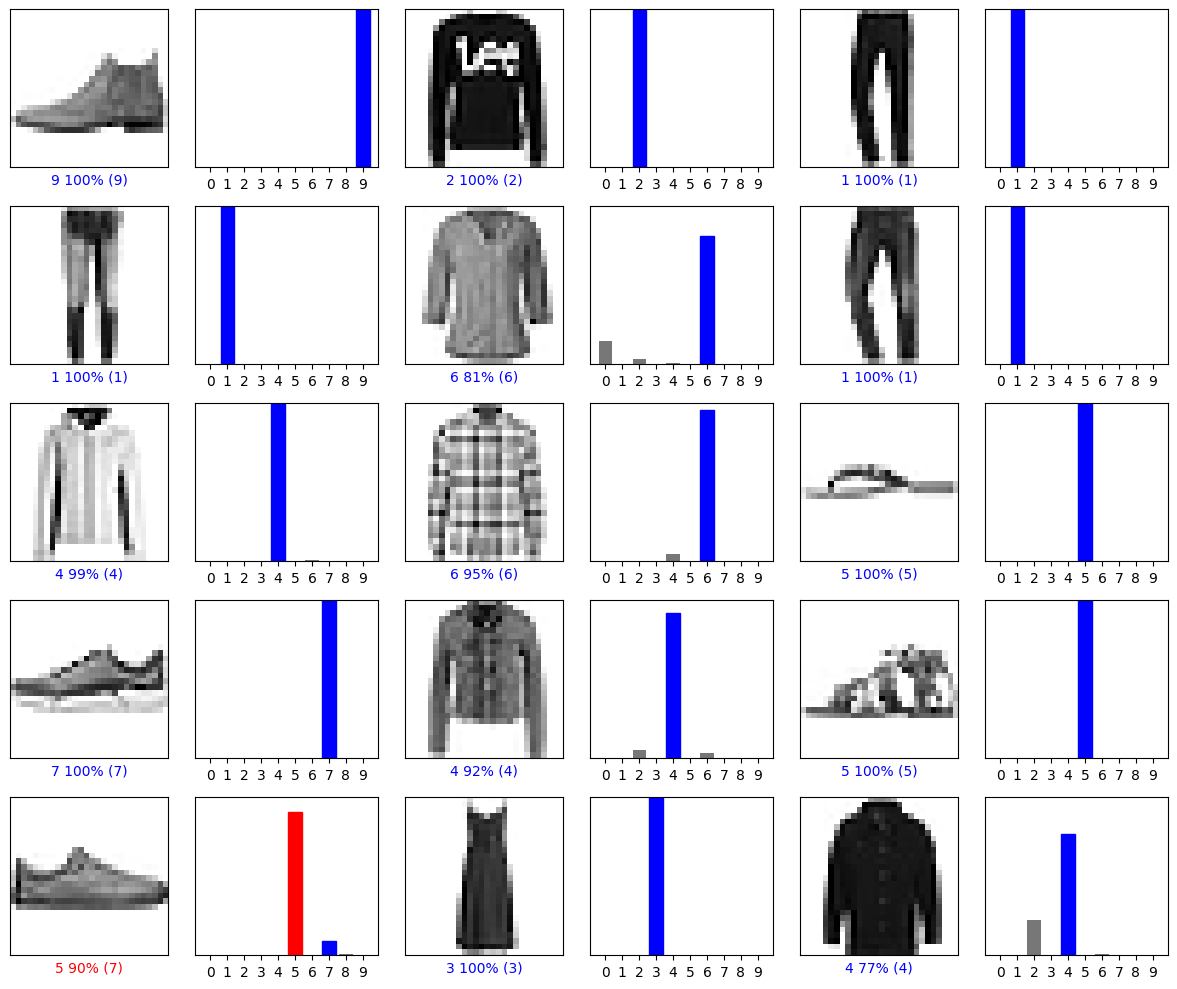

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model and 'test_images' and 'test_labels' are your test data and labels

# Get the model's predictions on the test data
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{predicted_label} {100*np.max(predictions_array):2.0f}% ({true_label})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot images and their predictions
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
